In [1]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(n,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0

    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax,ny*ay,nz*az))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=n*n)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))
    return geometry, geometry_lattice

In [14]:
#supercell size
nx = 12
ny = 7
nz = 6
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 2.0
pad = 2.0
cell = mp.Vector3(nx*ax+2*(dpml+pad),ny*ay+2*(dpml+pad),nz*az+2*(dpml+pad))

resolution = 25
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0,0,az/8.0)

fcen = 0.537
df = 0.07
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
h = mp.Harminv(mp.Ez, pos, fcen, df)
sim.run(mp.after_sources(h), until_after_sources=150)

# m = h.modes[0]
# f = m.freq
# Q = m.Q
#sim.run(mp.dft_ldos(fcen, df, 10), until_after_sources=1)
#sim.run(until=100)
mp.output_epsilon(sim)
#mp.output_hpwr(sim)

-----------
Initializing structure...
Meep progress: 0.02/292.857147217 = 0.0% done in 49.7s, 727204.2s to go
Meep progress: 0.08/292.857147217 = 0.0% done in 54.7s, 200130.6s to go
Meep progress: 0.14/292.857147217 = 0.0% done in 59.7s, 124831.8s to go
Meep progress: 0.2/292.857147217 = 0.1% done in 64.7s, 94675.2s to go
Meep progress: 0.26/292.857147217 = 0.1% done in 69.7s, 78434.6s to go
Meep progress: 0.32/292.857147217 = 0.1% done in 74.7s, 68265.3s to go
Meep progress: 0.38/292.857147217 = 0.1% done in 79.6s, 61284.1s to go
Meep progress: 0.44/292.857147217 = 0.2% done in 84.6s, 56218.9s to go
Meep progress: 0.5/292.857147217 = 0.2% done in 89.6s, 52370.4s to go
Meep progress: 0.56/292.857147217 = 0.2% done in 94.5s, 49344.0s to go
Meep progress: 0.62/292.857147217 = 0.2% done in 99.5s, 46916.9s to go
Meep progress: 0.68/292.857147217 = 0.2% done in 104.5s, 44917.7s to go
Meep progress: 0.74/292.857147217 = 0.3% done in 109.5s, 43236.0s to go
Meep progress: 0.8/292.857147217 = 0

Meep progress: 6.98/292.857147217 = 2.4% done in 627.3s, 25690.5s to go
Meep progress: 7.04/292.857147217 = 2.4% done in 632.2s, 25667.7s to go
Meep progress: 7.1/292.857147217 = 2.4% done in 637.2s, 25644.6s to go
Meep progress: 7.16/292.857147217 = 2.4% done in 642.2s, 25623.0s to go
Meep progress: 7.22/292.857147217 = 2.5% done in 647.1s, 25601.2s to go
Meep progress: 7.28/292.857147217 = 2.5% done in 652.1s, 25579.5s to go
Meep progress: 7.34/292.857147217 = 2.5% done in 657.1s, 25559.0s to go
Meep progress: 7.4/292.857147217 = 2.5% done in 662.1s, 25538.8s to go
Meep progress: 7.46/292.857147217 = 2.5% done in 667.0s, 25518.1s to go
Meep progress: 7.52/292.857147217 = 2.6% done in 672.0s, 25496.7s to go
Meep progress: 7.58/292.857147217 = 2.6% done in 676.9s, 25476.0s to go
Meep progress: 7.64/292.857147217 = 2.6% done in 681.9s, 25455.5s to go
Meep progress: 7.7/292.857147217 = 2.6% done in 686.8s, 25435.3s to go
Meep progress: 7.76/292.857147217 = 2.6% done in 691.8s, 25416.0s t

Meep progress: 13.82/292.857147217 = 4.7% done in 1193.5s, 24098.1s to go
Meep progress: 13.88/292.857147217 = 4.7% done in 1198.5s, 24088.1s to go
Meep progress: 13.94/292.857147217 = 4.8% done in 1203.5s, 24079.8s to go
Meep progress: 14.0/292.857147217 = 4.8% done in 1208.5s, 24070.6s to go
Meep progress: 14.06/292.857147217 = 4.8% done in 1213.5s, 24061.7s to go
Meep progress: 14.12/292.857147217 = 4.8% done in 1218.4s, 24052.5s to go
Meep progress: 14.18/292.857147217 = 4.8% done in 1223.4s, 24043.1s to go
Meep progress: 14.24/292.857147217 = 4.9% done in 1228.3s, 24033.5s to go
Meep progress: 14.3/292.857147217 = 4.9% done in 1233.3s, 24024.6s to go
Meep progress: 14.36/292.857147217 = 4.9% done in 1238.3s, 24015.4s to go
Meep progress: 14.42/292.857147217 = 4.9% done in 1243.3s, 24007.3s to go
Meep progress: 14.48/292.857147217 = 4.9% done in 1248.3s, 23997.8s to go
Meep progress: 14.54/292.857147217 = 5.0% done in 1253.2s, 23988.5s to go
Meep progress: 14.6/292.857147217 = 5.0%

Meep progress: 20.54/292.857147217 = 7.0% done in 1749.4s, 23193.0s to go
Meep progress: 20.6/292.857147217 = 7.0% done in 1754.3s, 23185.6s to go
Meep progress: 20.66/292.857147217 = 7.1% done in 1759.2s, 23178.1s to go
Meep progress: 20.72/292.857147217 = 7.1% done in 1764.2s, 23170.7s to go
Meep progress: 20.78/292.857147217 = 7.1% done in 1769.1s, 23163.8s to go
Meep progress: 20.84/292.857147217 = 7.1% done in 1774.1s, 23156.5s to go
Meep progress: 20.9/292.857147217 = 7.1% done in 1779.1s, 23150.3s to go
Meep progress: 20.96/292.857147217 = 7.2% done in 1784.1s, 23143.8s to go
Meep progress: 21.02/292.857147217 = 7.2% done in 1789.1s, 23136.6s to go
Meep progress: 21.08/292.857147217 = 7.2% done in 1794.0s, 23129.4s to go
Meep progress: 21.14/292.857147217 = 7.2% done in 1799.0s, 23122.9s to go
Meep progress: 21.2/292.857147217 = 7.2% done in 1804.0s, 23116.0s to go
Meep progress: 21.26/292.857147217 = 7.3% done in 1809.0s, 23109.7s to go
Meep progress: 21.32/292.857147217 = 7.3%

Meep progress: 27.8/292.857147217 = 9.5% done in 2349.5s, 22401.2s to go
Meep progress: 27.86/292.857147217 = 9.5% done in 2354.5s, 22395.1s to go
Meep progress: 27.92/292.857147217 = 9.5% done in 2359.4s, 22389.1s to go
Meep progress: 27.98/292.857147217 = 9.6% done in 2364.4s, 22383.0s to go
Meep progress: 28.04/292.857147217 = 9.6% done in 2369.3s, 22376.7s to go
Meep progress: 28.1/292.857147217 = 9.6% done in 2374.3s, 22370.4s to go
Meep progress: 28.16/292.857147217 = 9.6% done in 2379.3s, 22364.4s to go
Meep progress: 28.22/292.857147217 = 9.6% done in 2384.2s, 22358.3s to go
Meep progress: 28.28/292.857147217 = 9.7% done in 2389.1s, 22352.0s to go
Meep progress: 28.34/292.857147217 = 9.7% done in 2394.1s, 22346.1s to go
Meep progress: 28.4/292.857147217 = 9.7% done in 2399.1s, 22340.1s to go
Meep progress: 28.46/292.857147217 = 9.7% done in 2404.0s, 22333.8s to go
Meep progress: 28.52/292.857147217 = 9.7% done in 2409.0s, 22327.8s to go
Meep progress: 28.58/292.857147217 = 9.8%

Meep progress: 34.94/292.857147217 = 11.9% done in 2939.7s, 21700.4s to go
Meep progress: 35.0/292.857147217 = 12.0% done in 2944.7s, 21694.6s to go
Meep progress: 35.06/292.857147217 = 12.0% done in 2949.7s, 21688.9s to go
Meep progress: 35.12/292.857147217 = 12.0% done in 2954.6s, 21683.1s to go
Meep progress: 35.18/292.857147217 = 12.0% done in 2959.6s, 21677.5s to go
Meep progress: 35.24/292.857147217 = 12.0% done in 2964.5s, 21671.6s to go
Meep progress: 35.3/292.857147217 = 12.1% done in 2969.5s, 21666.0s to go
Meep progress: 35.36/292.857147217 = 12.1% done in 2974.4s, 21660.3s to go
Meep progress: 35.42/292.857147217 = 12.1% done in 2979.4s, 21654.5s to go
Meep progress: 35.48/292.857147217 = 12.1% done in 2984.3s, 21648.9s to go
Meep progress: 35.54/292.857147217 = 12.1% done in 2989.3s, 21643.1s to go
Meep progress: 35.6/292.857147217 = 12.2% done in 2994.2s, 21637.3s to go
Meep progress: 35.66/292.857147217 = 12.2% done in 2999.2s, 21631.4s to go
Meep progress: 35.72/292.857

Meep progress: 41.6/292.857147217 = 14.2% done in 3490.4s, 21081.7s to go
Meep progress: 41.66/292.857147217 = 14.2% done in 3495.4s, 21076.3s to go
Meep progress: 41.72/292.857147217 = 14.2% done in 3500.4s, 21070.8s to go
Meep progress: 41.78/292.857147217 = 14.3% done in 3505.3s, 21065.4s to go
Meep progress: 41.84/292.857147217 = 14.3% done in 3510.3s, 21059.8s to go
Meep progress: 41.9/292.857147217 = 14.3% done in 3515.3s, 21054.4s to go
Meep progress: 41.96/292.857147217 = 14.3% done in 3520.2s, 21048.8s to go
Meep progress: 42.02/292.857147217 = 14.3% done in 3525.1s, 21043.2s to go
Meep progress: 42.08/292.857147217 = 14.4% done in 3530.1s, 21037.6s to go
Meep progress: 42.14/292.857147217 = 14.4% done in 3535.0s, 21032.0s to go
Meep progress: 42.2/292.857147217 = 14.4% done in 3540.0s, 21026.7s to go
Meep progress: 42.26/292.857147217 = 14.4% done in 3544.9s, 21021.2s to go
Meep progress: 42.32/292.857147217 = 14.5% done in 3549.9s, 21015.6s to go
Meep progress: 42.38/292.857

Meep progress: 48.44/292.857147217 = 16.5% done in 4055.7s, 20464.2s to go
Meep progress: 48.5/292.857147217 = 16.6% done in 4060.7s, 20458.9s to go
Meep progress: 48.56/292.857147217 = 16.6% done in 4065.6s, 20453.6s to go
Meep progress: 48.62/292.857147217 = 16.6% done in 4070.6s, 20448.1s to go
Meep progress: 48.68/292.857147217 = 16.6% done in 4075.6s, 20442.8s to go
Meep progress: 48.74/292.857147217 = 16.6% done in 4080.5s, 20437.5s to go
Meep progress: 48.8/292.857147217 = 16.7% done in 4085.5s, 20432.2s to go
Meep progress: 48.86/292.857147217 = 16.7% done in 4090.5s, 20426.9s to go
Meep progress: 48.92/292.857147217 = 16.7% done in 4095.4s, 20421.7s to go
Meep progress: 48.98/292.857147217 = 16.7% done in 4100.4s, 20416.3s to go
Meep progress: 49.04/292.857147217 = 16.7% done in 4105.3s, 20411.0s to go
Meep progress: 49.1/292.857147217 = 16.8% done in 4110.3s, 20405.6s to go
Meep progress: 49.16/292.857147217 = 16.8% done in 4115.2s, 20400.2s to go
Meep progress: 49.22/292.857

Meep progress: 55.46/292.857147217 = 18.9% done in 4635.8s, 19843.8s to go
Meep progress: 55.52/292.857147217 = 19.0% done in 4640.8s, 19838.6s to go
Meep progress: 55.58/292.857147217 = 19.0% done in 4645.8s, 19833.2s to go
Meep progress: 55.64/292.857147217 = 19.0% done in 4650.7s, 19828.0s to go
Meep progress: 55.7/292.857147217 = 19.0% done in 4655.7s, 19822.6s to go
Meep progress: 55.76/292.857147217 = 19.0% done in 4660.6s, 19817.4s to go
Meep progress: 55.82/292.857147217 = 19.1% done in 4665.6s, 19812.1s to go
Meep progress: 55.88/292.857147217 = 19.1% done in 4670.5s, 19806.8s to go
Meep progress: 55.94/292.857147217 = 19.1% done in 4675.5s, 19801.5s to go
Meep progress: 56.0/292.857147217 = 19.1% done in 4680.4s, 19796.3s to go
Meep progress: 56.06/292.857147217 = 19.1% done in 4685.4s, 19791.1s to go
Meep progress: 56.12/292.857147217 = 19.2% done in 4690.3s, 19785.8s to go
Meep progress: 56.18/292.857147217 = 19.2% done in 4695.3s, 19780.4s to go
Meep progress: 56.24/292.85

Meep progress: 62.06/292.857147217 = 21.2% done in 5181.4s, 19269.5s to go
Meep progress: 62.12/292.857147217 = 21.2% done in 5186.4s, 19264.3s to go
Meep progress: 62.18/292.857147217 = 21.2% done in 5191.4s, 19259.2s to go
Meep progress: 62.24/292.857147217 = 21.3% done in 5196.4s, 19254.0s to go
Meep progress: 62.3/292.857147217 = 21.3% done in 5201.3s, 19248.8s to go
Meep progress: 62.36/292.857147217 = 21.3% done in 5206.3s, 19243.6s to go
Meep progress: 62.42/292.857147217 = 21.3% done in 5211.2s, 19238.4s to go
Meep progress: 62.48/292.857147217 = 21.3% done in 5216.2s, 19233.2s to go
Meep progress: 62.54/292.857147217 = 21.4% done in 5221.1s, 19228.0s to go
Meep progress: 62.6/292.857147217 = 21.4% done in 5226.1s, 19222.7s to go
Meep progress: 62.66/292.857147217 = 21.4% done in 5231.0s, 19217.5s to go
Meep progress: 62.72/292.857147217 = 21.4% done in 5236.0s, 19212.2s to go
Meep progress: 62.78/292.857147217 = 21.4% done in 5240.9s, 19206.9s to go
Meep progress: 62.84/292.85

Meep progress: 69.26/292.857147217 = 23.6% done in 5776.6s, 18649.0s to go
Meep progress: 69.32/292.857147217 = 23.7% done in 5781.6s, 18643.9s to go
Meep progress: 69.38/292.857147217 = 23.7% done in 5786.5s, 18638.8s to go
Meep progress: 69.44/292.857147217 = 23.7% done in 5791.5s, 18633.6s to go
Meep progress: 69.5/292.857147217 = 23.7% done in 5796.4s, 18628.5s to go
Meep progress: 69.56/292.857147217 = 23.8% done in 5801.4s, 18623.3s to go
Meep progress: 69.62/292.857147217 = 23.8% done in 5806.3s, 18618.1s to go
Meep progress: 69.68/292.857147217 = 23.8% done in 5811.3s, 18612.9s to go
Meep progress: 69.74/292.857147217 = 23.8% done in 5816.3s, 18607.8s to go
Meep progress: 69.8/292.857147217 = 23.8% done in 5821.2s, 18602.6s to go
Meep progress: 69.86/292.857147217 = 23.9% done in 5826.1s, 18597.4s to go
Meep progress: 69.92/292.857147217 = 23.9% done in 5831.1s, 18592.3s to go
Meep progress: 69.98/292.857147217 = 23.9% done in 5836.1s, 18587.1s to go
Meep progress: 70.04/292.85

Meep progress: 82.88/292.857147217 = 28.3% done in 6902.1s, 17486.6s to go
Meep progress: 82.94/292.857147217 = 28.3% done in 6907.1s, 17481.5s to go
Meep progress: 83.0/292.857147217 = 28.3% done in 6912.1s, 17476.4s to go
Meep progress: 83.06/292.857147217 = 28.4% done in 6917.0s, 17471.3s to go
Meep progress: 83.12/292.857147217 = 28.4% done in 6922.0s, 17466.2s to go
Meep progress: 83.18/292.857147217 = 28.4% done in 6926.9s, 17461.1s to go
Meep progress: 83.24/292.857147217 = 28.4% done in 6931.9s, 17456.1s to go
Meep progress: 83.3/292.857147217 = 28.4% done in 6936.8s, 17450.9s to go
Meep progress: 83.36/292.857147217 = 28.5% done in 6941.8s, 17445.9s to go
Meep progress: 83.42/292.857147217 = 28.5% done in 6946.8s, 17440.8s to go
Meep progress: 83.48/292.857147217 = 28.5% done in 6951.7s, 17435.7s to go
Meep progress: 83.54/292.857147217 = 28.5% done in 6956.6s, 17430.5s to go
Meep progress: 83.6/292.857147217 = 28.5% done in 6961.6s, 17425.5s to go
Meep progress: 83.66/292.857

Meep progress: 90.14/292.857147217 = 30.8% done in 7502.4s, 16872.3s to go
Meep progress: 90.2/292.857147217 = 30.8% done in 7507.3s, 16867.2s to go
Meep progress: 90.26/292.857147217 = 30.8% done in 7512.3s, 16862.1s to go
Meep progress: 90.32/292.857147217 = 30.8% done in 7517.3s, 16857.0s to go
Meep progress: 90.38/292.857147217 = 30.9% done in 7522.2s, 16851.9s to go
Meep progress: 90.44/292.857147217 = 30.9% done in 7527.2s, 16846.9s to go
Meep progress: 90.5/292.857147217 = 30.9% done in 7532.1s, 16841.7s to go
Meep progress: 90.56/292.857147217 = 30.9% done in 7537.1s, 16836.7s to go
Meep progress: 90.62/292.857147217 = 30.9% done in 7542.0s, 16831.5s to go
Meep progress: 90.68/292.857147217 = 31.0% done in 7546.9s, 16826.4s to go
Meep progress: 90.74/292.857147217 = 31.0% done in 7551.9s, 16821.3s to go
Meep progress: 90.8/292.857147217 = 31.0% done in 7556.8s, 16816.2s to go
Meep progress: 90.86/292.857147217 = 31.0% done in 7561.8s, 16811.2s to go
Meep progress: 90.92/292.857

Meep progress: 96.98/292.857147217 = 33.1% done in 8068.0s, 16295.5s to go
Meep progress: 97.04/292.857147217 = 33.1% done in 8072.9s, 16290.4s to go
Meep progress: 97.1/292.857147217 = 33.2% done in 8077.9s, 16285.3s to go
Meep progress: 97.16/292.857147217 = 33.2% done in 8082.8s, 16280.3s to go
Meep progress: 97.22/292.857147217 = 33.2% done in 8087.8s, 16275.2s to go
Meep progress: 97.28/292.857147217 = 33.2% done in 8092.7s, 16270.1s to go
Meep progress: 97.34/292.857147217 = 33.2% done in 8097.7s, 16265.0s to go
Meep progress: 97.4/292.857147217 = 33.3% done in 8102.7s, 16260.0s to go
Meep progress: 97.46/292.857147217 = 33.3% done in 8107.6s, 16254.9s to go
Meep progress: 97.52/292.857147217 = 33.3% done in 8112.6s, 16249.9s to go
Meep progress: 97.58/292.857147217 = 33.3% done in 8117.6s, 16244.9s to go
Meep progress: 97.64/292.857147217 = 33.3% done in 8122.5s, 16239.8s to go
Meep progress: 97.7/292.857147217 = 33.4% done in 8127.5s, 16234.8s to go
Meep progress: 97.76/292.857

Meep progress: 104.96/292.857147217 = 35.8% done in 8727.7s, 15624.2s to go
Meep progress: 105.02/292.857147217 = 35.9% done in 8732.7s, 15619.1s to go
Meep progress: 105.08/292.857147217 = 35.9% done in 8737.6s, 15614.0s to go
Meep progress: 105.14/292.857147217 = 35.9% done in 8742.5s, 15608.9s to go
Meep progress: 105.2/292.857147217 = 35.9% done in 8747.5s, 15603.9s to go
Meep progress: 105.26/292.857147217 = 35.9% done in 8752.5s, 15598.9s to go
Meep progress: 105.32/292.857147217 = 36.0% done in 8757.4s, 15593.8s to go
Meep progress: 105.38/292.857147217 = 36.0% done in 8762.4s, 15588.8s to go
Meep progress: 105.44/292.857147217 = 36.0% done in 8767.4s, 15583.8s to go
Meep progress: 105.5/292.857147217 = 36.0% done in 8772.3s, 15578.7s to go
Meep progress: 105.56/292.857147217 = 36.0% done in 8777.3s, 15573.7s to go
Meep progress: 105.62/292.857147217 = 36.1% done in 8782.3s, 15568.7s to go
Meep progress: 105.68/292.857147217 = 36.1% done in 8787.2s, 15563.6s to go
Meep progress:

Meep progress: 111.56/292.857147217 = 38.1% done in 9273.7s, 15070.7s to go
Meep progress: 111.62/292.857147217 = 38.1% done in 9278.7s, 15065.7s to go
Meep progress: 111.68/292.857147217 = 38.1% done in 9283.6s, 15060.7s to go
Meep progress: 111.74/292.857147217 = 38.2% done in 9288.6s, 15055.7s to go
Meep progress: 111.8/292.857147217 = 38.2% done in 9293.5s, 15050.7s to go
Meep progress: 111.86/292.857147217 = 38.2% done in 9298.5s, 15045.6s to go
Meep progress: 111.92/292.857147217 = 38.2% done in 9303.5s, 15040.6s to go
Meep progress: 111.98/292.857147217 = 38.2% done in 9308.4s, 15035.6s to go
Meep progress: 112.04/292.857147217 = 38.3% done in 9313.4s, 15030.5s to go
Meep progress: 112.1/292.857147217 = 38.3% done in 9318.3s, 15025.4s to go
Meep progress: 112.16/292.857147217 = 38.3% done in 9323.3s, 15020.4s to go
Meep progress: 112.22/292.857147217 = 38.3% done in 9328.2s, 15015.4s to go
Meep progress: 112.28/292.857147217 = 38.3% done in 9333.2s, 15010.3s to go
Meep progress:

Meep progress: 118.94/292.857147217 = 40.6% done in 9884.2s, 14452.9s to go
Meep progress: 119.0/292.857147217 = 40.6% done in 9889.1s, 14447.9s to go
Meep progress: 119.06/292.857147217 = 40.7% done in 9894.1s, 14442.9s to go
Meep progress: 119.12/292.857147217 = 40.7% done in 9899.1s, 14437.8s to go
Meep progress: 119.18/292.857147217 = 40.7% done in 9904.0s, 14432.8s to go
Meep progress: 119.24/292.857147217 = 40.7% done in 9909.0s, 14427.8s to go
Meep progress: 119.3/292.857147217 = 40.7% done in 9913.9s, 14422.8s to go
Meep progress: 119.36/292.857147217 = 40.8% done in 9918.9s, 14417.7s to go
Meep progress: 119.42/292.857147217 = 40.8% done in 9923.8s, 14412.7s to go
Meep progress: 119.48/292.857147217 = 40.8% done in 9928.8s, 14407.6s to go
Meep progress: 119.54/292.857147217 = 40.8% done in 9933.7s, 14402.6s to go
Meep progress: 119.6/292.857147217 = 40.8% done in 9938.7s, 14397.6s to go
Meep progress: 119.66/292.857147217 = 40.9% done in 9943.6s, 14392.5s to go
Meep progress: 

Meep progress: 125.78/292.857147217 = 42.9% done in 10449.4s, 13880.2s to go
Meep progress: 125.84/292.857147217 = 43.0% done in 10454.3s, 13875.2s to go
Meep progress: 125.9/292.857147217 = 43.0% done in 10459.3s, 13870.2s to go
Meep progress: 125.96/292.857147217 = 43.0% done in 10464.3s, 13865.2s to go
Meep progress: 126.02/292.857147217 = 43.0% done in 10469.3s, 13860.2s to go
Meep progress: 126.08/292.857147217 = 43.1% done in 10474.3s, 13855.2s to go
Meep progress: 126.14/292.857147217 = 43.1% done in 10479.2s, 13850.2s to go
Meep progress: 126.2/292.857147217 = 43.1% done in 10484.2s, 13845.2s to go
Meep progress: 126.26/292.857147217 = 43.1% done in 10489.1s, 13840.1s to go
Meep progress: 126.32/292.857147217 = 43.1% done in 10494.1s, 13835.1s to go
Meep progress: 126.38/292.857147217 = 43.2% done in 10499.1s, 13830.1s to go
Meep progress: 126.44/292.857147217 = 43.2% done in 10504.0s, 13825.1s to go
Meep progress: 126.5/292.857147217 = 43.2% done in 10509.0s, 13820.1s to go
Me

Meep progress: 133.04/292.857147217 = 45.4% done in 11049.6s, 13273.6s to go
Meep progress: 133.1/292.857147217 = 45.4% done in 11054.6s, 13268.6s to go
Meep progress: 133.16/292.857147217 = 45.5% done in 11059.6s, 13263.6s to go
Meep progress: 133.22/292.857147217 = 45.5% done in 11064.6s, 13258.6s to go
Meep progress: 133.28/292.857147217 = 45.5% done in 11069.5s, 13253.6s to go
Meep progress: 133.34/292.857147217 = 45.5% done in 11074.5s, 13248.6s to go
Meep progress: 133.4/292.857147217 = 45.6% done in 11079.4s, 13243.6s to go
Meep progress: 133.46/292.857147217 = 45.6% done in 11084.4s, 13238.6s to go
Meep progress: 133.52/292.857147217 = 45.6% done in 11089.3s, 13233.6s to go
Meep progress: 133.58/292.857147217 = 45.6% done in 11094.3s, 13228.5s to go
Meep progress: 133.64/292.857147217 = 45.6% done in 11099.3s, 13223.5s to go
Meep progress: 133.7/292.857147217 = 45.7% done in 11104.2s, 13218.5s to go
Meep progress: 133.76/292.857147217 = 45.7% done in 11109.2s, 13213.6s to go
Me

Meep progress: 139.82/292.857147217 = 47.7% done in 11610.5s, 12708.0s to go
Meep progress: 139.88/292.857147217 = 47.8% done in 11615.5s, 12703.0s to go
Meep progress: 139.94/292.857147217 = 47.8% done in 11620.4s, 12698.0s to go
Meep progress: 140.0/292.857147217 = 47.8% done in 11625.4s, 12693.0s to go
Meep progress: 140.06/292.857147217 = 47.8% done in 11630.3s, 12688.0s to go
Meep progress: 140.12/292.857147217 = 47.8% done in 11635.3s, 12683.0s to go
Meep progress: 140.18/292.857147217 = 47.9% done in 11640.2s, 12677.9s to go
Meep progress: 140.24/292.857147217 = 47.9% done in 11645.2s, 12672.9s to go
Meep progress: 140.3/292.857147217 = 47.9% done in 11650.2s, 12668.0s to go
Meep progress: 140.36/292.857147217 = 47.9% done in 11655.1s, 12663.0s to go
Meep progress: 140.42/292.857147217 = 47.9% done in 11660.1s, 12657.9s to go
Meep progress: 140.48/292.857147217 = 48.0% done in 11665.1s, 12653.0s to go
Meep progress: 140.54/292.857147217 = 48.0% done in 11670.0s, 12647.9s to go
M

Meep progress: 146.72/292.857147217 = 50.1% done in 12181.2s, 12132.8s to go
Meep progress: 146.78/292.857147217 = 50.1% done in 12186.2s, 12127.8s to go
Meep progress: 146.84/292.857147217 = 50.1% done in 12191.1s, 12122.8s to go
Meep progress: 146.9/292.857147217 = 50.2% done in 12196.1s, 12117.8s to go
Meep progress: 146.96/292.857147217 = 50.2% done in 12201.0s, 12112.8s to go
Meep progress: 147.02/292.857147217 = 50.2% done in 12206.0s, 12107.8s to go
Meep progress: 147.08/292.857147217 = 50.2% done in 12210.9s, 12102.8s to go
Meep progress: 147.14/292.857147217 = 50.2% done in 12215.9s, 12097.8s to go
Meep progress: 147.2/292.857147217 = 50.3% done in 12220.8s, 12092.8s to go
Meep progress: 147.26/292.857147217 = 50.3% done in 12225.8s, 12087.8s to go
Meep progress: 147.32/292.857147217 = 50.3% done in 12230.8s, 12082.8s to go
Meep progress: 147.38/292.857147217 = 50.3% done in 12235.8s, 12077.8s to go
Meep progress: 147.44/292.857147217 = 50.3% done in 12240.7s, 12072.8s to go
M

Meep progress: 153.8/292.857147217 = 52.5% done in 12767.0s, 11543.2s to go
Meep progress: 153.86/292.857147217 = 52.5% done in 12772.0s, 11538.2s to go
Meep progress: 153.92/292.857147217 = 52.6% done in 12776.9s, 11533.2s to go
Meep progress: 153.98/292.857147217 = 52.6% done in 12781.9s, 11528.2s to go
Meep progress: 154.04/292.857147217 = 52.6% done in 12786.9s, 11523.2s to go
Meep progress: 154.1/292.857147217 = 52.6% done in 12791.9s, 11518.2s to go
Meep progress: 154.16/292.857147217 = 52.6% done in 12796.8s, 11513.3s to go
Meep progress: 154.22/292.857147217 = 52.7% done in 12801.8s, 11508.3s to go
Meep progress: 154.28/292.857147217 = 52.7% done in 12806.8s, 11503.3s to go
Meep progress: 154.34/292.857147217 = 52.7% done in 12811.7s, 11498.2s to go
Meep progress: 154.4/292.857147217 = 52.7% done in 12816.6s, 11493.2s to go
Meep progress: 154.46/292.857147217 = 52.7% done in 12821.6s, 11488.2s to go
Meep progress: 154.52/292.857147217 = 52.8% done in 12826.5s, 11483.2s to go
Me

Meep progress: 160.88/292.857147217 = 54.9% done in 13352.7s, 10953.9s to go
Meep progress: 160.94/292.857147217 = 55.0% done in 13357.7s, 10948.9s to go
Meep progress: 161.0/292.857147217 = 55.0% done in 13362.7s, 10943.9s to go
Meep progress: 161.06/292.857147217 = 55.0% done in 13367.7s, 10938.9s to go
Meep progress: 161.12/292.857147217 = 55.0% done in 13372.6s, 10933.9s to go
Meep progress: 161.18/292.857147217 = 55.0% done in 13377.6s, 10928.9s to go
Meep progress: 161.24/292.857147217 = 55.1% done in 13382.6s, 10924.0s to go
Meep progress: 161.3/292.857147217 = 55.1% done in 13387.5s, 10918.9s to go
Meep progress: 161.36/292.857147217 = 55.1% done in 13392.5s, 10914.0s to go
Meep progress: 161.42/292.857147217 = 55.1% done in 13397.5s, 10909.0s to go
Meep progress: 161.48/292.857147217 = 55.1% done in 13402.4s, 10904.0s to go
Meep progress: 161.54/292.857147217 = 55.2% done in 13407.4s, 10899.0s to go
Meep progress: 161.6/292.857147217 = 55.2% done in 13412.3s, 10894.0s to go
Me

Meep progress: 167.48/292.857147217 = 57.2% done in 13898.4s, 10404.5s to go
Meep progress: 167.54/292.857147217 = 57.2% done in 13903.4s, 10399.5s to go
Meep progress: 167.6/292.857147217 = 57.2% done in 13908.4s, 10394.5s to go
Meep progress: 167.66/292.857147217 = 57.2% done in 13913.3s, 10389.5s to go
Meep progress: 167.72/292.857147217 = 57.3% done in 13918.3s, 10384.5s to go
Meep progress: 167.78/292.857147217 = 57.3% done in 13923.2s, 10379.5s to go
Meep progress: 167.84/292.857147217 = 57.3% done in 13928.2s, 10374.6s to go
Meep progress: 167.9/292.857147217 = 57.3% done in 13933.1s, 10369.5s to go
Meep progress: 167.96/292.857147217 = 57.4% done in 13938.1s, 10364.5s to go
Meep progress: 168.02/292.857147217 = 57.4% done in 13943.1s, 10359.5s to go
Meep progress: 168.08/292.857147217 = 57.4% done in 13948.0s, 10354.6s to go
Meep progress: 168.14/292.857147217 = 57.4% done in 13953.0s, 10349.6s to go
Meep progress: 168.2/292.857147217 = 57.4% done in 13957.9s, 10344.6s to go
Me

Meep progress: 174.14/292.857147217 = 59.5% done in 14449.5s, 9850.7s to go
Meep progress: 174.2/292.857147217 = 59.5% done in 14454.4s, 9845.7s to go
Meep progress: 174.26/292.857147217 = 59.5% done in 14459.4s, 9840.7s to go
Meep progress: 174.32/292.857147217 = 59.5% done in 14464.4s, 9835.7s to go
Meep progress: 174.38/292.857147217 = 59.5% done in 14469.3s, 9830.7s to go
Meep progress: 174.44/292.857147217 = 59.6% done in 14474.3s, 9825.7s to go
Meep progress: 174.5/292.857147217 = 59.6% done in 14479.2s, 9820.7s to go
Meep progress: 174.56/292.857147217 = 59.6% done in 14484.2s, 9815.7s to go
Meep progress: 174.62/292.857147217 = 59.6% done in 14489.2s, 9810.8s to go
Meep progress: 174.68/292.857147217 = 59.6% done in 14494.1s, 9805.8s to go
Meep progress: 174.74/292.857147217 = 59.7% done in 14499.0s, 9800.8s to go
Meep progress: 174.8/292.857147217 = 59.7% done in 14504.0s, 9795.8s to go
Meep progress: 174.86/292.857147217 = 59.7% done in 14509.0s, 9790.8s to go
Meep progress: 

Meep progress: 181.82/292.857147217 = 62.1% done in 15085.1s, 9212.4s to go
Meep progress: 181.88/292.857147217 = 62.1% done in 15090.0s, 9207.4s to go
Meep progress: 181.94/292.857147217 = 62.1% done in 15095.0s, 9202.5s to go
Meep progress: 182.0/292.857147217 = 62.1% done in 15100.0s, 9197.5s to go
Meep progress: 182.06/292.857147217 = 62.2% done in 15104.9s, 9192.5s to go
Meep progress: 182.12/292.857147217 = 62.2% done in 15109.9s, 9187.5s to go
Meep progress: 182.18/292.857147217 = 62.2% done in 15114.9s, 9182.5s to go
Meep progress: 182.24/292.857147217 = 62.2% done in 15119.8s, 9177.5s to go
Meep progress: 182.3/292.857147217 = 62.2% done in 15124.8s, 9172.6s to go
Meep progress: 182.36/292.857147217 = 62.3% done in 15129.8s, 9167.6s to go
Meep progress: 182.42/292.857147217 = 62.3% done in 15134.7s, 9162.6s to go
Meep progress: 182.48/292.857147217 = 62.3% done in 15139.7s, 9157.6s to go
Meep progress: 182.54/292.857147217 = 62.3% done in 15144.7s, 9152.6s to go
Meep progress:

Meep progress: 188.96/292.857147217 = 64.5% done in 15676.4s, 8619.4s to go
Meep progress: 189.02/292.857147217 = 64.5% done in 15681.3s, 8614.5s to go
Meep progress: 189.08/292.857147217 = 64.6% done in 15686.3s, 8609.5s to go
Meep progress: 189.14/292.857147217 = 64.6% done in 15691.3s, 8604.5s to go
Meep progress: 189.2/292.857147217 = 64.6% done in 15696.3s, 8599.5s to go
Meep progress: 189.26/292.857147217 = 64.6% done in 15701.3s, 8594.6s to go
Meep progress: 189.32/292.857147217 = 64.6% done in 15706.3s, 8589.6s to go
Meep progress: 189.38/292.857147217 = 64.7% done in 15711.2s, 8584.6s to go
Meep progress: 189.44/292.857147217 = 64.7% done in 15716.2s, 8579.6s to go
Meep progress: 189.5/292.857147217 = 64.7% done in 15721.1s, 8574.6s to go
Meep progress: 189.56/292.857147217 = 64.7% done in 15726.1s, 8569.6s to go
Meep progress: 189.62/292.857147217 = 64.7% done in 15731.1s, 8564.7s to go
Meep progress: 189.68/292.857147217 = 64.8% done in 15736.1s, 8559.7s to go
Meep progress:

Meep progress: 203.06/292.857147217 = 69.3% done in 16843.4s, 7448.5s to go
Meep progress: 203.12/292.857147217 = 69.4% done in 16848.4s, 7443.5s to go
Meep progress: 203.18/292.857147217 = 69.4% done in 16853.3s, 7438.5s to go
Meep progress: 203.24/292.857147217 = 69.4% done in 16858.3s, 7433.5s to go
Meep progress: 203.3/292.857147217 = 69.4% done in 16863.3s, 7428.6s to go
Meep progress: 203.36/292.857147217 = 69.4% done in 16868.2s, 7423.6s to go
Meep progress: 203.42/292.857147217 = 69.5% done in 16873.2s, 7418.6s to go
Meep progress: 203.48/292.857147217 = 69.5% done in 16878.2s, 7413.6s to go
Meep progress: 203.54/292.857147217 = 69.5% done in 16883.2s, 7408.7s to go
Meep progress: 203.6/292.857147217 = 69.5% done in 16888.2s, 7403.7s to go
Meep progress: 203.66/292.857147217 = 69.5% done in 16893.1s, 7398.7s to go
Meep progress: 203.72/292.857147217 = 69.6% done in 16898.1s, 7393.7s to go
Meep progress: 203.78/292.857147217 = 69.6% done in 16903.0s, 7388.7s to go
Meep progress:

Meep progress: 209.72/292.857147217 = 71.6% done in 17394.0s, 6895.3s to go
Meep progress: 209.78/292.857147217 = 71.6% done in 17399.0s, 6890.4s to go
Meep progress: 209.84/292.857147217 = 71.7% done in 17403.9s, 6885.4s to go
Meep progress: 209.9/292.857147217 = 71.7% done in 17408.9s, 6880.4s to go
Meep progress: 209.96/292.857147217 = 71.7% done in 17413.8s, 6875.4s to go
Meep progress: 210.02/292.857147217 = 71.7% done in 17418.8s, 6870.4s to go
Meep progress: 210.08/292.857147217 = 71.7% done in 17423.8s, 6865.4s to go
Meep progress: 210.14/292.857147217 = 71.8% done in 17428.8s, 6860.5s to go
Meep progress: 210.2/292.857147217 = 71.8% done in 17433.7s, 6855.5s to go
Meep progress: 210.26/292.857147217 = 71.8% done in 17438.7s, 6850.5s to go
Meep progress: 210.32/292.857147217 = 71.8% done in 17443.6s, 6845.5s to go
Meep progress: 210.38/292.857147217 = 71.8% done in 17448.6s, 6840.5s to go
Meep progress: 210.44/292.857147217 = 71.9% done in 17453.6s, 6835.6s to go
Meep progress:

Meep progress: 216.56/292.857147217 = 73.9% done in 17959.7s, 6327.4s to go
Meep progress: 216.62/292.857147217 = 74.0% done in 17964.6s, 6322.5s to go
Meep progress: 216.68/292.857147217 = 74.0% done in 17969.6s, 6317.5s to go
Meep progress: 216.74/292.857147217 = 74.0% done in 17974.5s, 6312.5s to go
Meep progress: 216.8/292.857147217 = 74.0% done in 17979.5s, 6307.5s to go
Meep progress: 216.86/292.857147217 = 74.0% done in 17984.4s, 6302.5s to go
Meep progress: 216.92/292.857147217 = 74.1% done in 17989.4s, 6297.5s to go
Meep progress: 216.98/292.857147217 = 74.1% done in 17994.3s, 6292.5s to go
Meep progress: 217.04/292.857147217 = 74.1% done in 17999.3s, 6287.6s to go
Meep progress: 217.1/292.857147217 = 74.1% done in 18004.3s, 6282.6s to go
Meep progress: 217.16/292.857147217 = 74.2% done in 18009.2s, 6277.6s to go
Meep progress: 217.22/292.857147217 = 74.2% done in 18014.1s, 6272.6s to go
Meep progress: 217.28/292.857147217 = 74.2% done in 18019.1s, 6267.6s to go
Meep progress:

Meep progress: 223.22/292.857147217 = 76.2% done in 18510.3s, 5774.6s to go
Meep progress: 223.28/292.857147217 = 76.2% done in 18515.2s, 5769.6s to go
Meep progress: 223.34/292.857147217 = 76.3% done in 18520.2s, 5764.6s to go
Meep progress: 223.4/292.857147217 = 76.3% done in 18525.2s, 5759.6s to go
Meep progress: 223.46/292.857147217 = 76.3% done in 18530.1s, 5754.7s to go
Meep progress: 223.52/292.857147217 = 76.3% done in 18535.1s, 5749.7s to go
Meep progress: 223.58/292.857147217 = 76.3% done in 18540.0s, 5744.7s to go
Meep progress: 223.64/292.857147217 = 76.4% done in 18545.0s, 5739.7s to go
Meep progress: 223.7/292.857147217 = 76.4% done in 18550.0s, 5734.7s to go
Meep progress: 223.76/292.857147217 = 76.4% done in 18554.9s, 5729.8s to go
Meep progress: 223.82/292.857147217 = 76.4% done in 18559.9s, 5724.8s to go
Meep progress: 223.88/292.857147217 = 76.4% done in 18564.8s, 5719.8s to go
Meep progress: 223.94/292.857147217 = 76.5% done in 18569.8s, 5714.8s to go
Meep progress:

Meep progress: 230.12/292.857147217 = 78.6% done in 19080.7s, 5201.9s to go
Meep progress: 230.18/292.857147217 = 78.6% done in 19085.7s, 5197.0s to go
Meep progress: 230.24/292.857147217 = 78.6% done in 19090.6s, 5192.0s to go
Meep progress: 230.3/292.857147217 = 78.6% done in 19095.6s, 5187.0s to go
Meep progress: 230.36/292.857147217 = 78.7% done in 19100.6s, 5182.0s to go
Meep progress: 230.42/292.857147217 = 78.7% done in 19105.5s, 5177.0s to go
Meep progress: 230.48/292.857147217 = 78.7% done in 19110.5s, 5172.1s to go
Meep progress: 230.54/292.857147217 = 78.7% done in 19115.5s, 5167.1s to go
Meep progress: 230.6/292.857147217 = 78.7% done in 19120.4s, 5162.1s to go
Meep progress: 230.66/292.857147217 = 78.8% done in 19125.4s, 5157.1s to go
Meep progress: 230.72/292.857147217 = 78.8% done in 19130.3s, 5152.1s to go
Meep progress: 230.78/292.857147217 = 78.8% done in 19135.3s, 5147.2s to go
Meep progress: 230.84/292.857147217 = 78.8% done in 19140.3s, 5142.2s to go
Meep progress:

Meep progress: 237.92/292.857147217 = 81.2% done in 19725.6s, 4554.8s to go
Meep progress: 237.98/292.857147217 = 81.3% done in 19730.6s, 4549.8s to go
Meep progress: 238.04/292.857147217 = 81.3% done in 19735.6s, 4544.8s to go
Meep progress: 238.1/292.857147217 = 81.3% done in 19740.6s, 4539.8s to go
Meep progress: 238.16/292.857147217 = 81.3% done in 19745.5s, 4534.9s to go
Meep progress: 238.22/292.857147217 = 81.3% done in 19750.5s, 4529.9s to go
Meep progress: 238.28/292.857147217 = 81.4% done in 19755.4s, 4524.9s to go
Meep progress: 238.34/292.857147217 = 81.4% done in 19760.4s, 4519.9s to go
Meep progress: 238.4/292.857147217 = 81.4% done in 19765.3s, 4514.9s to go
Meep progress: 238.46/292.857147217 = 81.4% done in 19770.3s, 4510.0s to go
Meep progress: 238.52/292.857147217 = 81.4% done in 19775.2s, 4505.0s to go
Meep progress: 238.58/292.857147217 = 81.5% done in 19780.1s, 4500.0s to go
Meep progress: 238.64/292.857147217 = 81.5% done in 19785.1s, 4495.0s to go
Meep progress:

Meep progress: 245.12/292.857147217 = 83.7% done in 20320.8s, 3957.5s to go
Meep progress: 245.18/292.857147217 = 83.7% done in 20325.7s, 3952.5s to go
Meep progress: 245.24/292.857147217 = 83.7% done in 20330.7s, 3947.5s to go
Meep progress: 245.3/292.857147217 = 83.8% done in 20335.7s, 3942.5s to go
Meep progress: 245.36/292.857147217 = 83.8% done in 20340.6s, 3937.6s to go
Meep progress: 245.42/292.857147217 = 83.8% done in 20345.5s, 3932.6s to go
Meep progress: 245.48/292.857147217 = 83.8% done in 20350.5s, 3927.6s to go
Meep progress: 245.54/292.857147217 = 83.8% done in 20355.4s, 3922.6s to go
Meep progress: 245.6/292.857147217 = 83.9% done in 20360.4s, 3917.6s to go
Meep progress: 245.66/292.857147217 = 83.9% done in 20365.4s, 3912.7s to go
Meep progress: 245.72/292.857147217 = 83.9% done in 20370.4s, 3907.7s to go
Meep progress: 245.78/292.857147217 = 83.9% done in 20375.3s, 3902.7s to go
Meep progress: 245.84/292.857147217 = 83.9% done in 20380.3s, 3897.7s to go
Meep progress:

Meep progress: 251.96/292.857147217 = 86.0% done in 20886.7s, 3390.2s to go
Meep progress: 252.02/292.857147217 = 86.1% done in 20891.6s, 3385.3s to go
Meep progress: 252.08/292.857147217 = 86.1% done in 20896.6s, 3380.3s to go
Meep progress: 252.14/292.857147217 = 86.1% done in 20901.6s, 3375.3s to go
Meep progress: 252.2/292.857147217 = 86.1% done in 20906.6s, 3370.3s to go
Meep progress: 252.26/292.857147217 = 86.1% done in 20911.5s, 3365.4s to go
Meep progress: 252.32/292.857147217 = 86.2% done in 20916.5s, 3360.4s to go
Meep progress: 252.38/292.857147217 = 86.2% done in 20921.4s, 3355.4s to go
Meep progress: 252.44/292.857147217 = 86.2% done in 20926.4s, 3350.4s to go
Meep progress: 252.5/292.857147217 = 86.2% done in 20931.3s, 3345.5s to go
Meep progress: 252.56/292.857147217 = 86.2% done in 20936.3s, 3340.5s to go
Meep progress: 252.62/292.857147217 = 86.3% done in 20941.3s, 3335.5s to go
Meep progress: 252.68/292.857147217 = 86.3% done in 20946.2s, 3330.5s to go
Meep progress:

Meep progress: 265.28/292.857147217 = 90.6% done in 21988.2s, 2285.8s to go
Meep progress: 265.34/292.857147217 = 90.6% done in 21993.1s, 2280.8s to go
Meep progress: 265.4/292.857147217 = 90.6% done in 21998.1s, 2275.8s to go
Meep progress: 265.46/292.857147217 = 90.6% done in 22003.0s, 2270.8s to go
Meep progress: 265.52/292.857147217 = 90.7% done in 22008.0s, 2265.9s to go
Meep progress: 265.58/292.857147217 = 90.7% done in 22012.9s, 2260.9s to go
Meep progress: 265.64/292.857147217 = 90.7% done in 22017.8s, 2255.9s to go
Meep progress: 265.7/292.857147217 = 90.7% done in 22022.8s, 2250.9s to go
Meep progress: 265.76/292.857147217 = 90.7% done in 22027.7s, 2246.0s to go
Meep progress: 265.82/292.857147217 = 90.8% done in 22032.7s, 2241.0s to go
Meep progress: 265.88/292.857147217 = 90.8% done in 22037.6s, 2236.0s to go
Meep progress: 265.94/292.857147217 = 90.8% done in 22042.6s, 2231.0s to go
Meep progress: 266.0/292.857147217 = 90.8% done in 22047.5s, 2226.1s to go
Meep progress: 

Meep progress: 278.84/292.857147217 = 95.2% done in 23109.7s, 1161.7s to go
Meep progress: 278.9/292.857147217 = 95.2% done in 23114.7s, 1156.7s to go
Meep progress: 278.96/292.857147217 = 95.3% done in 23119.6s, 1151.8s to go
Meep progress: 279.02/292.857147217 = 95.3% done in 23124.6s, 1146.8s to go
Meep progress: 279.08/292.857147217 = 95.3% done in 23129.6s, 1141.8s to go
Meep progress: 279.14/292.857147217 = 95.3% done in 23134.6s, 1136.8s to go
Meep progress: 279.2/292.857147217 = 95.3% done in 23139.6s, 1131.9s to go
Meep progress: 279.26/292.857147217 = 95.4% done in 23144.5s, 1126.9s to go
Meep progress: 279.32/292.857147217 = 95.4% done in 23149.5s, 1121.9s to go
Meep progress: 279.38/292.857147217 = 95.4% done in 23154.5s, 1117.0s to go
Meep progress: 279.44/292.857147217 = 95.4% done in 23159.4s, 1112.0s to go
Meep progress: 279.5/292.857147217 = 95.4% done in 23164.4s, 1107.0s to go
Meep progress: 279.56/292.857147217 = 95.5% done in 23169.4s, 1102.0s to go
Meep progress: 

Meep progress: 285.62/292.857147217 = 97.5% done in 23670.8s, 599.8s to go
Meep progress: 285.68/292.857147217 = 97.5% done in 23675.7s, 594.8s to go
Meep progress: 285.74/292.857147217 = 97.6% done in 23680.7s, 589.8s to go
Meep progress: 285.8/292.857147217 = 97.6% done in 23685.6s, 584.9s to go
Meep progress: 285.86/292.857147217 = 97.6% done in 23690.5s, 579.9s to go
Meep progress: 285.92/292.857147217 = 97.6% done in 23695.5s, 574.9s to go
Meep progress: 285.98/292.857147217 = 97.7% done in 23700.5s, 569.9s to go
Meep progress: 286.04/292.857147217 = 97.7% done in 23705.4s, 565.0s to go
Meep progress: 286.1/292.857147217 = 97.7% done in 23710.4s, 560.0s to go
Meep progress: 286.16/292.857147217 = 97.7% done in 23715.3s, 555.0s to go
Meep progress: 286.22/292.857147217 = 97.7% done in 23720.3s, 550.0s to go
Meep progress: 286.28/292.857147217 = 97.8% done in 23725.2s, 545.1s to go
Meep progress: 286.34/292.857147217 = 97.8% done in 23730.2s, 540.1s to go
Meep progress: 286.4/292.85

Meep progress: 292.82/292.857147217 = 100.0% done in 24268.3s, 3.1s to go
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.541825368949, -2.55002473556e-09, 106239237.877, 36.0864375896, 9.24239610167-34.8827907744i, 1.29168789538e-10+0.0i
run 0 finished at t = 292.86 (14643 timesteps)


In [ ]:
mp.output_epsilon(sim)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
freqs = np.linspace(0.1,0.9,100)
plt.plot(freqs,sim.ldos_data)

In [ ]:
12:7:5

In [ ]:
!rm LDOS.txt
file1 = open("LDOS.txt","a")#append mode 
for i in range(0,100):
    file1.write(str(freqs[i]))
    file1.write(" ")
    file1.write(str(sim.ldos_data[i])) 
    file1.write("\n")
file1.close()

In [ ]:
import matplotlib.pyplot as plt
plt.pcolor(sim.get_array(center=mp.Vector3(0,0,0), size=mp.Vector3(nx*ax,0,nz*az), component=mp.Ez))
plt.colorbar()
plt.show()

In [ ]:
from __future__ import division
#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 0.5
cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az+2*dpml) 

Th = 100
resolution = 15
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.2,0.1,0.3)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=Th)
#sim.output_epsilon()

In [ ]:
sim.ldos_data

In [ ]:
#tutorial 
from __future__ import division

import math
import meep as mp
import argparse


resolution = 20
sxy = 2
dpml = 1
sxy = sxy + 2 * dpml
cell = mp.Vector3(sxy, sxy, sxy)

pml_layers = [mp.PML(dpml)]
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]

w = 0.3
geometry.append(mp.Block(center=mp.Vector3(a / 2), size=mp.Vector3(2 * t, w, sxy),
                            material=mp.air))

fcen = math.sqrt(0.5) / a
df = 0.2
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez,
                        center=mp.Vector3(0.1))]

symmetries = [mp.Mirror(mp.Y)]

Th = 100

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=sources,
                    symmetries=symmetries,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, 0, 1), until_after_sources=Th)
#h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)
#sim.run(mp.after_sources(h), until_after_sources=Th)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
#Vmode = 0.25 * a * a
#print("ldos0:, {}".format(Q / Vmode / (2 * math.pi * f * math.pi * 0.5)))


Text(0,0.5,'Q')

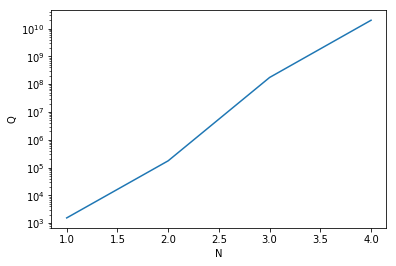

In [11]:
data =[1.55e3,1.75454e5,1.74940708e8,2e10]
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],data)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Q')

In [4]:
1.3e10

13000000000.0